In [1]:
import os
os.chdir(r"C:\Users\colli\OneDrive\Documents\Parkinsons Project Regis")
import pandas as pd
import glob

In [2]:
subjects = pd.read_csv('subjects.csv')

In [3]:
events = pd.read_csv('events.csv')

In [4]:
tasks = pd.read_csv('tasks.csv')

In [5]:
meta = pd.read_csv('tdcsfog_metadata.csv')

In [6]:
defog = pd.read_csv('defog_metadata.csv')

In [7]:
sub = pd.read_csv('sample_submission.csv')

In [8]:
train = glob.glob('train/**/**')

In [9]:
def reader(f):
    df = pd.read_csv(f)
    df['Id'] = f.split('\\\\')[-1].split('.')[0]
    return df
# read train data
train = pd.concat([reader(f) for f in train]).fillna(0); print(train.shape)
cols = [c for c in train.columns if c not in ['Id', 'StartHesitation', 'Turn' , 'Walking', 'Valid', 'Task','Event']] # except categorical and target fetaure

(30839488, 11)


In [10]:
train.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,Id,Event
0,0,-1.0,0.044129,-0.25,0.0,0.0,0.0,False,False,train\defog\02ea782681,0.0
1,1,-1.0,0.034431,-0.25,0.0,0.0,0.0,False,False,train\defog\02ea782681,0.0
2,2,-1.0,0.031250,-0.25,0.0,0.0,0.0,False,False,train\defog\02ea782681,0.0
3,3,-1.0,0.031250,-0.25,0.0,0.0,0.0,False,False,train\defog\02ea782681,0.0
4,4,-1.0,0.031250,-0.25,0.0,0.0,0.0,False,False,train\defog\02ea782681,0.0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30839488 entries, 0 to 4224
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Time             int64  
 1   AccV             float64
 2   AccML            float64
 3   AccAP            float64
 4   StartHesitation  float64
 5   Turn             float64
 6   Walking          float64
 7   Valid            object 
 8   Task             object 
 9   Id               object 
 10  Event            float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.8+ GB


In [12]:
train.describe()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Event
count,3.083949e+07,3.083949e+07,3.083949e+07,3.083949e+07,3.083949e+07,3.083949e+07,3.083949e+07,3.083949e+07
mean,8.104209e+04,-2.853547e+00,-7.176152e-02,3.223149e-01,9.899321e-03,7.286266e-02,9.735538e-03,1.623244e-04
std,7.757087e+04,3.555443e+00,6.220057e-01,1.384934e+00,9.900164e-02,2.599109e-01,9.818736e-02,1.273962e-02
min,0.000000e+00,-3.552112e+01,-2.616440e+01,-4.782964e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.345600e+04,-1.062500e+00,-1.440556e-01,-3.021181e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.209300e+04,-9.700277e-01,-3.125000e-02,-1.068925e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.247820e+05,-9.169647e-01,6.805153e-02,3.267068e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.434950e+05,2.090695e+01,2.748472e+01,3.033769e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [13]:
cols = ['Valid', 'Task']
train[cols] = train[cols].astype('category')

In [14]:
cols1 = ['AccV', 'AccML','AccAP','StartHesitation','Turn','Walking','Event',]
train[cols1] = train[cols1].astype('float16')

In [15]:
train['Time'] = train['Time'].astype('int8')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30839488 entries, 0 to 4224
Data columns (total 11 columns):
 #   Column           Dtype   
---  ------           -----   
 0   Time             int8    
 1   AccV             float16 
 2   AccML            float16 
 3   AccAP            float16 
 4   StartHesitation  float16 
 5   Turn             float16 
 6   Walking          float16 
 7   Valid            category
 8   Task             category
 9   Id               object  
 10  Event            float16 
dtypes: category(2), float16(7), int8(1), object(1)
memory usage: 970.6+ MB


In [17]:
subjects.head()

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,04fcdb,1.0,63,M,3.0,30.0,NaN,0
1,05595e,1.0,56,M,8.0,28.0,NaN,0
2,0967b2,1.0,59,M,10.0,38.0,48.0,19
3,0967b2,2.0,59,M,10.0,37.0,44.0,13
4,097078,NaN,70,F,10.0,27.0,50.0,20


In [18]:
subjects.isnull().sum()

Subject          0
Visit           62
Age              0
Sex              0
YearsSinceDx     0
UPDRSIII_On      1
UPDRSIII_Off    41
NFOGQ            0
dtype: int64

In [19]:
import seaborn as sns

C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

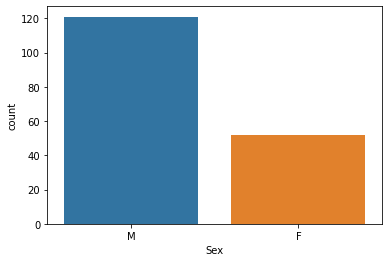

In [20]:
#EDA Subjects data
sns.countplot(subjects['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

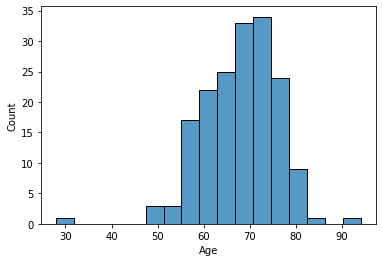

In [21]:
sns.histplot(subjects['Age'])

<AxesSubplot:xlabel='YearsSinceDx', ylabel='Count'>

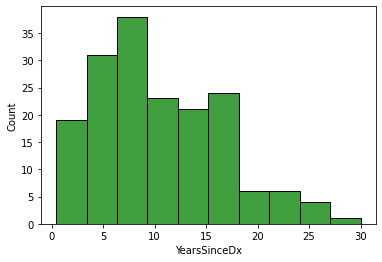

In [22]:
sns.histplot(subjects['YearsSinceDx'], color = 'green')

<AxesSubplot:xlabel='UPDRSIII_On', ylabel='Count'>

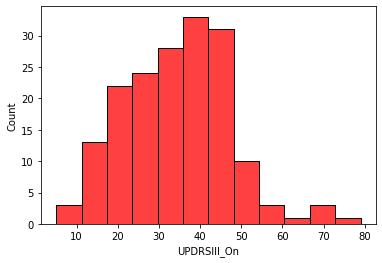

In [23]:
sns.histplot(subjects['UPDRSIII_On'], color = 'red')

<AxesSubplot:xlabel='UPDRSIII_Off', ylabel='Count'>

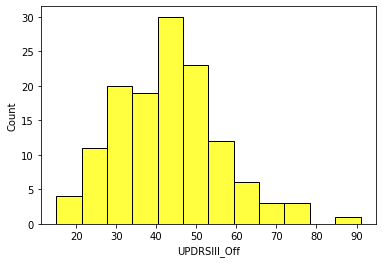

In [24]:
sns.histplot(subjects['UPDRSIII_Off'], color = 'yellow')

In [25]:
tasks.head()

,Id,Begin,End,Task
0,02ab235146,10.00,190.48,Rest1
1,02ab235146,211.24,271.56,Rest2
2,02ab235146,505.88,522.40,4MW
3,02ab235146,577.96,594.64,4MW-C
4,02ab235146,701.32,715.28,MB1


In [26]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      2817 non-null   object 
 1   Begin   2817 non-null   float64
 2   End     2817 non-null   float64
 3   Task    2817 non-null   object 
dtypes: float64(2), object(2)
memory usage: 88.2+ KB


In [27]:
tasks['Task'].unique()

array(['Rest1', 'Rest2', '4MW', '4MW-C', 'MB1', 'MB2a', 'MB2b', 'MB3-R',
       'MB3-L', 'MB4', 'MB5', 'MB6-R', 'MB6-L', 'MB7', 'MB8', 'MB9',
       'MB10', 'MB11', 'MB12', 'MB13', 'TUG-ST', 'TUG-DT', 'TUG-C',
       'Turning-ST', 'Turning-DT', 'Turning-C', 'Hotspot1', 'Hotspot1-C',
       'Hotspot2', 'Hotspot2-C', 'MB6'], dtype=object)

In [28]:
tasks['Length'] = tasks['End'] - tasks['Begin']

In [29]:
tasks.head()

,Id,Begin,End,Task,Length
0,02ab235146,10.00,190.48,Rest1,180.48
1,02ab235146,211.24,271.56,Rest2,60.32
2,02ab235146,505.88,522.40,4MW,16.52
3,02ab235146,577.96,594.64,4MW-C,16.68
4,02ab235146,701.32,715.28,MB1,13.96


In [30]:
tasks.groupby('Task')['Length'].mean()

Task
4MW            16.742168
4MW-C          18.444077
Hotspot1       19.805146
Hotspot1-C     19.661356
Hotspot2       57.677015
Hotspot2-C     57.270153
MB1             5.218015
MB10           12.152212
MB11           10.900179
MB12            7.263586
MB13            8.758779
MB2a            6.845810
MB2b            6.760318
MB3-L          13.335517
MB3-R          12.237815
MB4             3.902638
MB5             4.530712
MB6             4.023333
MB6-L           4.158355
MB6-R           4.162885
MB7            30.991477
MB8            21.458338
MB9            30.580231
Rest1         178.256378
Rest2          60.590000
TUG-C          19.021294
TUG-DT         22.462824
TUG-ST         16.011014
Turning-C      52.903918
Turning-DT     72.360219
Turning-ST     56.416672
Name: Length, dtype: float64

In [31]:
defog.head()

,Id,Subject,Visit,Medication
0,02ab235146,ab54e1,2,on
1,02ea782681,bf608b,2,on
2,06414383cf,c0b71e,2,off
3,092b4c1819,b6a627,1,off
4,0a900ed8a2,b7bd52,2,on


C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Visit', ylabel='count'>

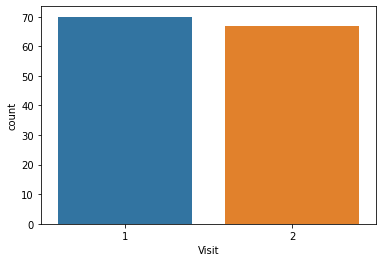

In [32]:
sns.countplot(defog['Visit'])

C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Medication', ylabel='count'>

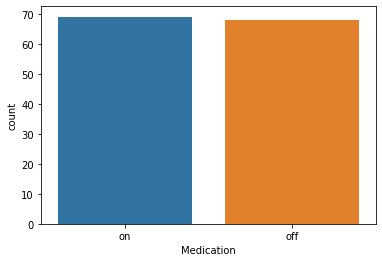

In [33]:
sns.countplot(defog['Medication'])

In [34]:
meta.head()

,Id,Subject,Visit,Test,Medication
0,003f117e14,13abfd,3,2,on
1,009ee11563,d81e3a,4,2,on
2,011322847a,203e85,2,2,on
3,01d0fe7266,203e85,2,1,off
4,024418ba39,cecfb8,19,3,on


C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valid', ylabel='count'>

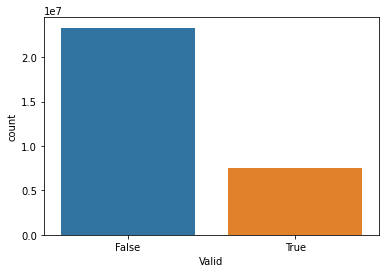

In [35]:
sns.countplot(train['Valid'])

<AxesSubplot:xlabel='Task', ylabel='count'>

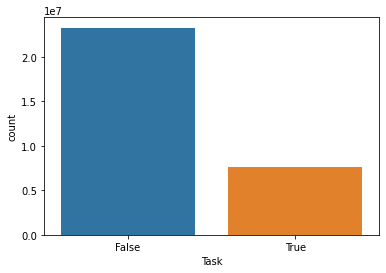

In [36]:
sns.countplot(train['Task'])

<AxesSubplot:xlabel='Event', ylabel='count'>

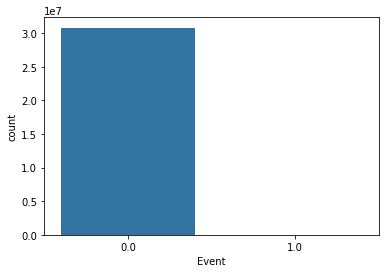

In [37]:
sns.countplot(train['Event'])

In [38]:
(train['Event']==1).sum()

5006

In [39]:
(train['Event']==0).sum()

30834482

In [40]:
train = train[train.Valid != False]

In [41]:
train = train[train.Task != False]

In [42]:
train.count()

Time               7517375
AccV               7517375
AccML              7517375
AccAP              7517375
StartHesitation    7517375
Turn               7517375
Walking            7517375
Valid              7517375
Task               7517375
Id                 7517375
Event              7517375
dtype: int64

In [43]:
(train['Event']==1).sum()

4209

In [44]:
(train['Event']==0).sum()

7513166

In [45]:
train.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,Id,Event
1000,-24,-0.970215,0.061615,-0.265625,0.0,0.0,0.0,True,True,train\defog\02ea782681,0.0
1001,-23,-0.984375,0.044495,-0.265625,0.0,0.0,0.0,True,True,train\defog\02ea782681,0.0
1002,-22,-0.984375,0.029022,-0.265625,0.0,0.0,0.0,True,True,train\defog\02ea782681,0.0
1003,-21,-0.984375,0.015625,-0.265625,0.0,0.0,0.0,True,True,train\defog\02ea782681,0.0
1004,-20,-0.984863,0.015327,-0.265625,0.0,0.0,0.0,True,True,train\defog\02ea782681,0.0


C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Turn', ylabel='count'>

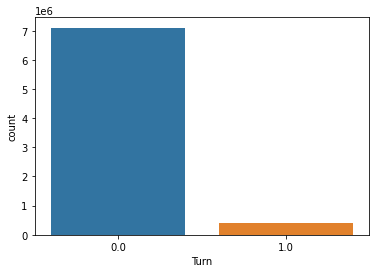

In [46]:
sns.countplot(train['Turn'])

C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Walking', ylabel='count'>

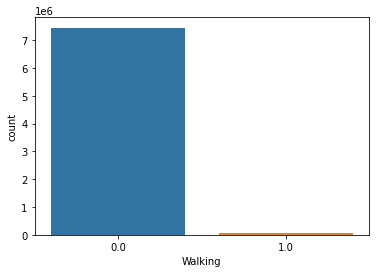

In [47]:
sns.countplot(train['Walking'])

C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StartHesitation', ylabel='count'>

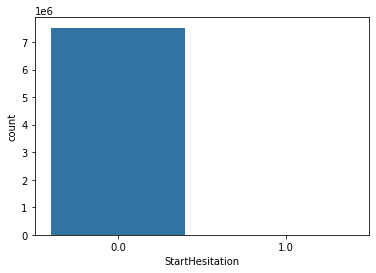

In [48]:
sns.countplot(train['StartHesitation'])

In [49]:
(train['StartHesitation']==1).sum()

88

In [50]:
train['Id'] = train['Id'].str[-10:]

In [51]:
train.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,Id,Event
1000,-24,-0.970215,0.061615,-0.265625,0.0,0.0,0.0,True,True,02ea782681,0.0
1001,-23,-0.984375,0.044495,-0.265625,0.0,0.0,0.0,True,True,02ea782681,0.0
1002,-22,-0.984375,0.029022,-0.265625,0.0,0.0,0.0,True,True,02ea782681,0.0
1003,-21,-0.984375,0.015625,-0.265625,0.0,0.0,0.0,True,True,02ea782681,0.0
1004,-20,-0.984863,0.015327,-0.265625,0.0,0.0,0.0,True,True,02ea782681,0.0


In [52]:
join_df = pd.merge(defog, subjects, how='left', on='Subject').fillna(-1)

In [53]:
join_df.head()

,Id,Subject,Visit_x,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28
1,02ab235146,ab54e1,2,on,2.0,79,F,8.0,38.0,64.0,28
2,02ea782681,bf608b,2,on,1.0,67,M,7.0,15.0,48.0,23
3,02ea782681,bf608b,2,on,2.0,67,M,7.0,14.0,57.0,19
4,06414383cf,c0b71e,2,off,1.0,61,F,7.0,45.0,52.0,22


In [54]:
join_df2 = pd.merge(meta, subjects, how='left', on='Subject').fillna(-1)

In [55]:
join_df2.head()

,Id,Subject,Visit_x,Test,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,003f117e14,13abfd,3,2,on,-1.0,68,F,9.0,17.0,15.0,15
1,009ee11563,d81e3a,4,2,on,-1.0,71,M,10.0,42.0,-1.0,24
2,011322847a,203e85,2,2,on,-1.0,67,M,12.0,27.0,28.0,19
3,01d0fe7266,203e85,2,1,off,-1.0,67,M,12.0,27.0,28.0,19
4,024418ba39,cecfb8,19,3,on,-1.0,60,F,7.0,30.0,-1.0,19


In [56]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            250 non-null    object 
 1   Subject       250 non-null    object 
 2   Visit_x       250 non-null    int64  
 3   Medication    250 non-null    object 
 4   Visit_y       250 non-null    float64
 5   Age           250 non-null    int64  
 6   Sex           250 non-null    object 
 7   YearsSinceDx  250 non-null    float64
 8   UPDRSIII_On   250 non-null    float64
 9   UPDRSIII_Off  250 non-null    float64
 10  NFOGQ         250 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 23.4+ KB


In [57]:
cols1 = ['Visit_x', 'YearsSinceDx','NFOGQ']
join_df[cols1] = join_df[cols1].astype('int8')

In [58]:
cols2 = ['Visit_y', 'YearsSinceDx','UPDRSIII_On','UPDRSIII_Off']
join_df[cols2] = join_df[cols2].astype('float16')

In [59]:
join_df2[cols1] = join_df2[cols1].astype('int8')
join_df2[cols2] = join_df2[cols2].astype('float16')

In [60]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            250 non-null    object 
 1   Subject       250 non-null    object 
 2   Visit_x       250 non-null    int8   
 3   Medication    250 non-null    object 
 4   Visit_y       250 non-null    float16
 5   Age           250 non-null    int64  
 6   Sex           250 non-null    object 
 7   YearsSinceDx  250 non-null    float16
 8   UPDRSIII_On   250 non-null    float16
 9   UPDRSIII_Off  250 non-null    float16
 10  NFOGQ         250 non-null    int8   
dtypes: float16(4), int64(1), int8(2), object(4)
memory usage: 14.2+ KB


In [61]:
events.head()

,Id,Init,Completion,Type,Kinetic
0,003f117e14,8.61312,14.7731,Turn,1.0
1,009ee11563,11.38470,41.1847,Turn,1.0
2,009ee11563,54.66470,58.7847,Turn,1.0
3,011322847a,28.09660,30.2966,Turn,1.0
4,01d0fe7266,30.31840,31.8784,Turn,1.0


In [62]:
join_df3 = pd.merge(join_df, events, how='left', on='Id').fillna(-1)

In [63]:
join_df3.head()

,Id,Subject,Visit_x,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Init,Completion,Type,Kinetic
0,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,1969.173,1972.535,-1,-1.0
1,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2078.982,2080.524,-1,-1.0
2,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2290.606,2291.952,-1,-1.0
3,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2704.292,2704.770,-1,-1.0
4,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2785.534,2785.774,-1,-1.0


In [64]:
join_df4 = pd.merge(join_df2, events, how='left', on='Id').fillna(-1)

In [65]:
join_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 0 to 1626
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1627 non-null   object 
 1   Subject       1627 non-null   object 
 2   Visit_x       1627 non-null   int8   
 3   Test          1627 non-null   int64  
 4   Medication    1627 non-null   object 
 5   Visit_y       1627 non-null   float16
 6   Age           1627 non-null   int64  
 7   Sex           1627 non-null   object 
 8   YearsSinceDx  1627 non-null   float16
 9   UPDRSIII_On   1627 non-null   float16
 10  UPDRSIII_Off  1627 non-null   float16
 11  NFOGQ         1627 non-null   int8   
 12  Init          1627 non-null   float64
 13  Completion    1627 non-null   float64
 14  Type          1627 non-null   object 
 15  Kinetic       1627 non-null   float64
dtypes: float16(4), float64(3), int64(2), int8(2), object(5)
memory usage: 155.7+ KB


In [66]:
join_df3 = join_df3.drop(join_df3['Visit_y'])

In [67]:
join_df3.head()

,Id,Subject,Visit_x,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Init,Completion,Type,Kinetic
0,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,1969.173,1972.535,-1,-1.0
3,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2704.292,2704.770,-1,-1.0
4,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2785.534,2785.774,-1,-1.0
5,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2785.786,2786.344,-1,-1.0
6,02ab235146,ab54e1,2,on,1.0,79,F,8.0,52.0,55.0,28,2827.264,2829.428,-1,-1.0


In [68]:
column_list = ['Id','Subject','Visit_x','Medication','Age','Sex','YearsSinceDx','UPDRSIII_On','UPDRSIII_Off','NFOGQ','Init','Completion','Type','Kinetic']

In [69]:
join_df4 = join_df4[column_list]

In [70]:
join_df4.head()

,Id,Subject,Visit_x,Medication,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Init,Completion,Type,Kinetic
0,003f117e14,13abfd,3,on,68,F,9.0,17.0,15.0,15,8.61312,14.7731,Turn,1.0
1,009ee11563,d81e3a,4,on,71,M,10.0,42.0,-1.0,24,11.38470,41.1847,Turn,1.0
2,009ee11563,d81e3a,4,on,71,M,10.0,42.0,-1.0,24,54.66470,58.7847,Turn,1.0
3,011322847a,203e85,2,on,67,M,12.0,27.0,28.0,19,28.09660,30.2966,Turn,1.0
4,01d0fe7266,203e85,2,off,67,M,12.0,27.0,28.0,19,30.31840,31.8784,Turn,1.0


In [71]:
cols2 = ['Init', 'Completion','Kinetic']
join_df3[cols2] = join_df3[cols2].astype('float16')
cols3 = ['Age']
join_df3[cols3] = join_df3[cols3].astype('int8')

In [72]:
cols2 = ['Init', 'Completion','Kinetic']
join_df4[cols2] = join_df4[cols2].astype('float16')
cols3 = ['Age']
join_df4[cols3] = join_df4[cols3].astype('int8')

In [73]:
join_df3['Type'] = join_df3['Type'].astype('category')

In [74]:
join_df4['Type'] = join_df4['Type'].astype('category')

C:\Users\colli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

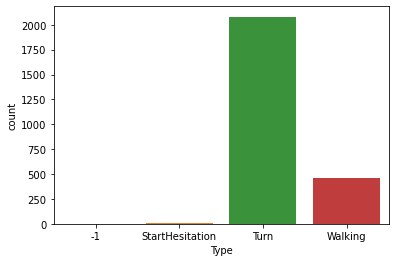

In [84]:
sns.countplot(join_df3['Type'])

<AxesSubplot:xlabel='Type', ylabel='count'>

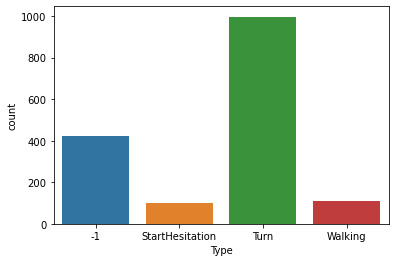

In [76]:
sns.countplot(join_df4['Type'])

In [83]:
join_df3 = join_df3[join_df3.Type != -1]

In [85]:
join_df4 = join_df4[join_df4.Type != -1]

In [89]:
join_df3 = pd.get_dummies(join_df3
               ,columns = ['Type']
               )

In [91]:
join_df4 = pd.get_dummies(join_df4
               ,columns = ['Type']
               )

In [108]:
join_df3.head()

,Id,Subject,Visit_x,Medication,Visit_y,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ,Init,Completion,Kinetic,Type_-1,Type_StartHesitation,Type_Turn,Type_Walking
14,02ea782681,bf608b,2,0,1.0,67,1,7.0,15.0,48.0,23,1395.00,1396.00,1.0,0,0,1,0
15,02ea782681,bf608b,2,0,1.0,67,1,7.0,15.0,48.0,23,1484.00,1484.00,1.0,0,0,1,0
16,02ea782681,bf608b,2,0,2.0,67,1,7.0,14.0,57.0,19,1395.00,1396.00,1.0,0,0,1,0
17,02ea782681,bf608b,2,0,2.0,67,1,7.0,14.0,57.0,19,1484.00,1484.00,1.0,0,0,1,0
18,06414383cf,c0b71e,2,0,1.0,61,1,7.0,45.0,52.0,22,433.75,435.25,0.0,0,0,1,0


In [105]:
join_df3['Sex'] = join_df3['Sex'].map({'F': 1, 'M': 0})

In [107]:
join_df3['Medication'] = join_df4['Medication'].map({'on': 1, 'off': 0})

In [138]:
join_df4['Sex'] = join_df3['Sex'].map({'F': 1, 'M': 0})
join_df4['Medication'] = join_df4['Medication'].map({'on': 1, 'off': 0})

In [139]:
all_dfs = [join_df3,join_df4]

In [140]:
all_dfs_concat = pd.concat(all_dfs)

In [144]:
all_dfs_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3761 entries, 14 to 1625
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    3761 non-null   object 
 1   Subject               3761 non-null   object 
 2   Visit_x               3761 non-null   int8   
 3   Medication            2556 non-null   float64
 4   Visit_y               2556 non-null   float16
 5   Age                   3761 non-null   int8   
 6   Sex                   2556 non-null   float64
 7   YearsSinceDx          3761 non-null   float16
 8   UPDRSIII_On           3761 non-null   float16
 9   UPDRSIII_Off          3761 non-null   float16
 10  NFOGQ                 3761 non-null   int8   
 11  Init                  3761 non-null   float16
 12  Completion            3761 non-null   float16
 13  Kinetic               3761 non-null   float16
 14  Type_-1               3761 non-null   uint8  
 15  Type_StartHesitation

In [110]:
from sklearn.model_selection import train_test_split

In [151]:
X = all_dfs_concat[['Age','YearsSinceDx','UPDRSIII_On','UPDRSIII_Off','NFOGQ','Init','Completion','Kinetic']]
ySH = all_dfs_concat['Type_StartHesitation']
yT = all_dfs_concat['Type_Turn']
yW = all_dfs_concat['Type_Walking']

In [153]:
X_train, X_test, ySH_train, ySH_test = train_test_split(X, ySH, test_size = 0.3, random_state = 22)
X_train, X_test, yT_train, yT_test = train_test_split(X, yT, test_size = 0.3, random_state = 22)
X_train, X_test, yW_train, yW_test = train_test_split(X, yW, test_size = 0.3, random_state = 22)

In [154]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clfSH = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clfT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clfW = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [155]:
clfSH.fit(X_train,ySH_train)
clfT.fit(X_train,yT_train)
clfW .fit(X_train,yW_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [156]:
ySH_pred = clfSH.predict(X_test)
yT_pred = clfT.predict(X_test)
yW_pred = clfW.predict(X_test)

In [157]:
from sklearn.metrics import classification_report
print('StartHesitation:')
print(classification_report(ySH_test, ySH_pred))
print('Turning:')
print(classification_report(yT_test, yT_pred))
print('Walking:')
print(classification_report(yW_test, yW_pred))

StartHesitation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1090
           1       0.81      0.33      0.47        39

    accuracy                           0.97      1129
   macro avg       0.89      0.67      0.73      1129
weighted avg       0.97      0.97      0.97      1129

Turning:
              precision    recall  f1-score   support

           0       0.86      0.09      0.16       200
           1       0.84      1.00      0.91       929

    accuracy                           0.84      1129
   macro avg       0.85      0.54      0.54      1129
weighted avg       0.84      0.84      0.78      1129

Walking:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       968
           1       1.00      0.07      0.14       161

    accuracy                           0.87      1129
   macro avg       0.93      0.54      0.53      1129
weighted avg       0.89      0.87      